In [23]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
import seaborn as sns

In [24]:
filepath = "Resources/us_state_vaccinations.csv"

# https://ourworldindata.org/us-states-vaccinations

# To be able to track the vaccination campaign in the United States,
# we are making state-by-state data available in the following charts.

In [25]:
df = pd.read_csv(filepath)

In [26]:
df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [38]:
df.location.value_counts()

United States     452
Alabama           429
Puerto Rico       429
Nebraska          429
Nevada            429
                 ... 
Maryland          429
Massachusetts     429
Michigan          429
Wyoming           429
Long Term Care    269
Name: location, Length: 65, dtype: int64

In [39]:
df.location.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

In [44]:
mask = df.location == 'United States'
sub = df.loc[mask]
sub

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
23435,2020-12-20,United States,556208.0,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23436,2020-12-21,United States,614117.0,NaN,NaN,NaN,0.18,NaN,NaN,NaN,57909.0,57909.0,174.0,NaN,NaN,NaN
23437,2020-12-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127432.0,384.0,NaN,NaN,NaN
23438,2020-12-23,United States,1008025.0,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,150606.0,454.0,NaN,NaN,NaN
23439,2020-12-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191001.0,575.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23882,2022-03-12,United States,556777608.0,695483935.0,254492315.0,65.24,167.70,216587984.0,76.65,209.48,379981.0,272767.0,822.0,0.801,95896178.0,28.88
23883,2022-03-13,United States,556980091.0,695483935.0,254551489.0,65.25,167.76,216647869.0,76.67,209.48,202483.0,266820.0,804.0,0.801,95973403.0,28.91
23884,2022-03-14,United States,557138106.0,695949235.0,254599776.0,65.27,167.81,216690804.0,76.68,209.62,158015.0,257979.0,777.0,0.801,96035748.0,28.93
23885,2022-03-15,United States,557407604.0,696302775.0,254681134.0,65.29,167.89,216767955.0,76.71,209.72,269498.0,258884.0,780.0,0.801,96139624.0,28.96


In [46]:
mask2 = df.location == 'Texas'
sub2 = df.loc[mask2]
sub2

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
23006,2021-01-12,Texas,911461.0,1949125.0,809148.0,0.35,3.14,101317.0,2.79,6.72,NaN,NaN,NaN,0.468,NaN,NaN
23007,2021-01-13,Texas,978042.0,1984225.0,861072.0,0.40,3.37,115965.0,2.97,6.84,66581.0,66581.0,2296.0,0.493,NaN,NaN
23008,2021-01-14,Texas,1043624.0,2105600.0,917387.0,NaN,3.60,NaN,3.16,7.26,65582.0,66082.0,2279.0,0.496,NaN,NaN
23009,2021-01-15,Texas,1160242.0,2105600.0,1003412.0,0.54,4.00,155660.0,3.46,7.26,116618.0,82927.0,2860.0,0.551,NaN,NaN
23010,2021-01-16,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77429.0,2670.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430,2022-03-12,Texas,44755582.0,59363595.0,20727169.0,60.33,154.35,17493588.0,71.48,204.73,29151.0,26882.0,927.0,0.754,6325014.0,21.81
23431,2022-03-13,Texas,44777465.0,59363595.0,20733407.0,60.35,154.43,17500458.0,71.50,204.73,21883.0,29918.0,1032.0,0.754,6332292.0,21.84
23432,2022-03-14,Texas,44788647.0,59392095.0,20737551.0,60.37,154.47,17503509.0,71.52,204.83,11182.0,26236.0,905.0,0.754,6335594.0,21.85
23433,2022-03-15,Texas,44832725.0,59425735.0,20768708.0,60.45,154.62,17528045.0,71.63,204.95,44078.0,28965.0,999.0,0.754,6347949.0,21.89


In [47]:
sub2.describe()

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
count,3.910000e+02,3.910000e+02,3.910000e+02,390.000000,391.000000,3.900000e+02,391.000000,391.000000,373.000000,428.000000,428.000000,391.000000,1.280000e+02,128.000000
mean,2.641886e+07,3.433622e+07,1.380559e+07,38.808256,91.112660,1.125283e+07,47.612302,118.417187,109253.302949,102996.485981,3552.126168,0.759642,4.288109e+06,14.788828
std,1.286780e+07,1.675851e+07,5.793152e+06,19.023140,44.377813,5.515931e+06,19.979175,57.796354,70680.029229,56419.098773,1945.778319,0.050854,1.788155e+06,6.166900
min,9.114610e+05,1.949125e+06,8.091480e+05,0.350000,3.140000,1.013170e+05,2.790000,6.720000,0.000000,26236.000000,905.000000,0.468000,1.005935e+06,3.470000
25%,1.815615e+07,2.390061e+07,1.082314e+07,25.632500,62.615000,7.431249e+06,37.330000,82.430000,60375.000000,68722.000000,2370.250000,0.752000,2.589156e+06,8.927500
50%,2.770093e+07,3.369666e+07,1.517146e+07,44.225000,95.530000,1.282310e+07,52.320000,116.210000,92011.000000,87491.000000,3017.500000,0.762000,4.859158e+06,16.755000
75%,3.653333e+07,4.861832e+07,1.836261e+07,54.350000,125.995000,1.575934e+07,63.325000,167.670000,133339.000000,120402.500000,4152.750000,0.780500,5.963588e+06,20.565000
max,4.486853e+07,5.947724e+07,2.078334e+07,60.480000,154.740000,1.753800e+07,71.680000,205.120000,466249.000000,307347.000000,10600.000000,0.843000,6.356771e+06,21.920000


In [45]:
df.describe()

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
count,2.511900e+04,2.485900e+04,2.485500e+04,23557.000000,23656.000000,2.477500e+04,23632.000000,23636.000000,2.409800e+04,2.768300e+04,26096.000000,24859.000000,7.953000e+03,7563.000000
mean,1.005222e+07,1.238932e+07,5.346385e+06,41.793008,96.058741,4.365702e+06,50.547023,118.652936,4.211521e+04,4.080511e+04,3795.882319,0.792151,1.867302e+06,18.504010
std,4.392294e+07,5.400365e+07,2.282505e+07,21.446851,49.578261,1.913837e+07,22.558995,57.801190,1.979863e+05,1.837401e+05,2718.208558,0.118268,8.179276e+06,10.701062
min,4.160000e+02,6.000000e+03,4.010000e+02,0.000000,0.170000,1.000000e+00,0.240000,6.140000,0.000000e+00,0.000000e+00,0.000000,0.043000,8.000000e+00,0.010000
25%,7.674100e+05,9.907900e+05,4.491240e+05,27.130000,61.817500,2.906600e+05,36.190000,82.480000,1.492250e+03,2.659000e+03,1892.000000,0.755000,1.481390e+05,9.480000
50%,2.685663e+06,3.316230e+06,1.490336e+06,46.040000,98.915000,1.097878e+06,53.820000,120.715000,8.487000e+03,1.007000e+04,3033.000000,0.805000,5.286410e+05,18.360000
75%,6.940556e+06,8.190235e+06,3.538319e+06,57.420000,131.060000,2.949584e+06,66.102500,160.382500,2.597125e+04,2.544950e+04,5014.250000,0.856000,1.355552e+06,25.530000
max,5.576446e+08,6.968011e+08,2.547506e+08,87.760000,220.010000,2.168298e+08,100.600000,274.360000,4.629928e+06,3.384387e+06,27652.000000,1.138000,9.623277e+07,51.900000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27748 entries, 0 to 27747
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 27748 non-null  object 
 1   location                             27748 non-null  object 
 2   total_vaccinations                   25119 non-null  float64
 3   total_distributed                    24859 non-null  float64
 4   people_vaccinated                    24855 non-null  float64
 5   people_fully_vaccinated_per_hundred  23557 non-null  float64
 6   total_vaccinations_per_hundred       23656 non-null  float64
 7   people_fully_vaccinated              24775 non-null  float64
 8   people_vaccinated_per_hundred        23632 non-null  float64
 9   distributed_per_hundred              23636 non-null  float64
 10  daily_vaccinations_raw               24098 non-null  float64
 11  daily_vaccinations          

In [28]:
df.shape

(27748, 16)

In [29]:
df.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
       'total_boosters_per_hundred'],
      dtype='object')

In [32]:
corrs = df.corr()
corrs

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
total_vaccinations,1.000000,0.999522,0.995611,0.110820,0.115736,0.996367,0.118009,0.117240,0.621201,0.643090,-0.040703,0.049190,0.849567,-0.027734
total_distributed,0.999522,1.000000,0.994561,0.107506,0.113257,0.994184,0.114919,0.116277,0.631320,0.652664,-0.039262,0.042413,0.854422,-0.028249
people_vaccinated,0.995611,0.994561,1.000000,0.098246,0.100434,0.996916,0.106344,0.100887,0.665044,0.688729,-0.031201,0.048635,0.809480,-0.045059
people_fully_vaccinated_per_hundred,0.110820,0.107506,0.098246,1.000000,0.979433,0.113366,0.987401,0.949885,-0.068603,-0.066991,-0.355595,0.581777,0.067254,0.629509
total_vaccinations_per_hundred,0.115736,0.113257,0.100434,0.979433,1.000000,0.113377,0.982721,0.979471,-0.061542,-0.060330,-0.308808,0.546700,0.093095,0.803474
people_fully_vaccinated,0.996367,0.994184,0.996916,0.113366,0.113377,1.000000,0.118625,0.113902,0.609602,0.633129,-0.045203,0.052185,0.806134,-0.045575
people_vaccinated_per_hundred,0.118009,0.114919,0.106344,0.987401,0.982721,0.118625,1.000000,0.955249,-0.051808,-0.049290,-0.272798,0.596600,0.074961,0.601201
distributed_per_hundred,0.117240,0.116277,0.100887,0.949885,0.979471,0.113902,0.955249,1.000000,-0.062935,-0.061227,-0.329907,0.418551,0.113001,0.798252
daily_vaccinations_raw,0.621201,0.631320,0.665044,-0.068603,-0.061542,0.609602,-0.051808,-0.062935,1.000000,0.963931,0.120652,-0.012603,0.593854,-0.091842
daily_vaccinations,0.643090,0.652664,0.688729,-0.066991,-0.060330,0.633129,-0.049290,-0.061227,0.963931,1.000000,0.119710,-0.009779,0.626693,-0.090097


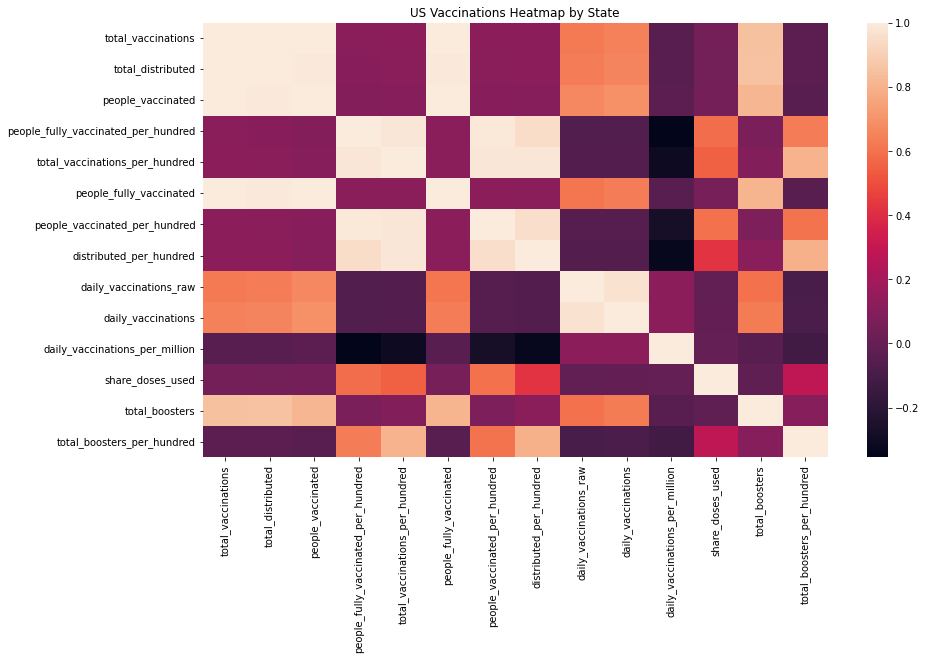

In [37]:
plt.figure(figsize=(14,8))
plt.title('US Vaccinations Heatmap by State')
sns.heatmap(corrs)
plt.show()